Number of training samples: 14041

Entity distribution:
MISC: 37 (51.39%)
ORG: 24 (33.33%)
LOC: 11 (15.28%)


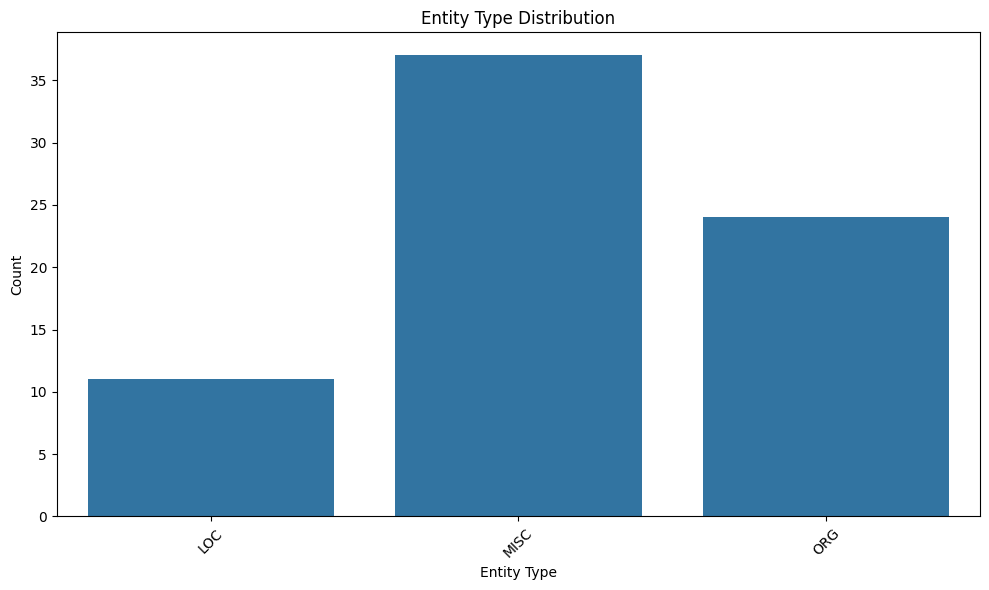

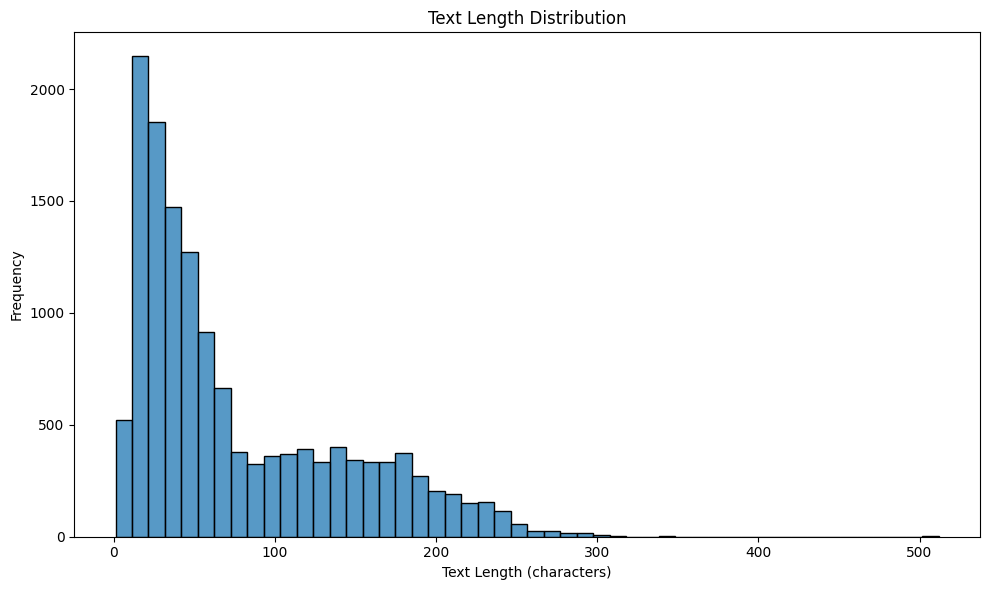

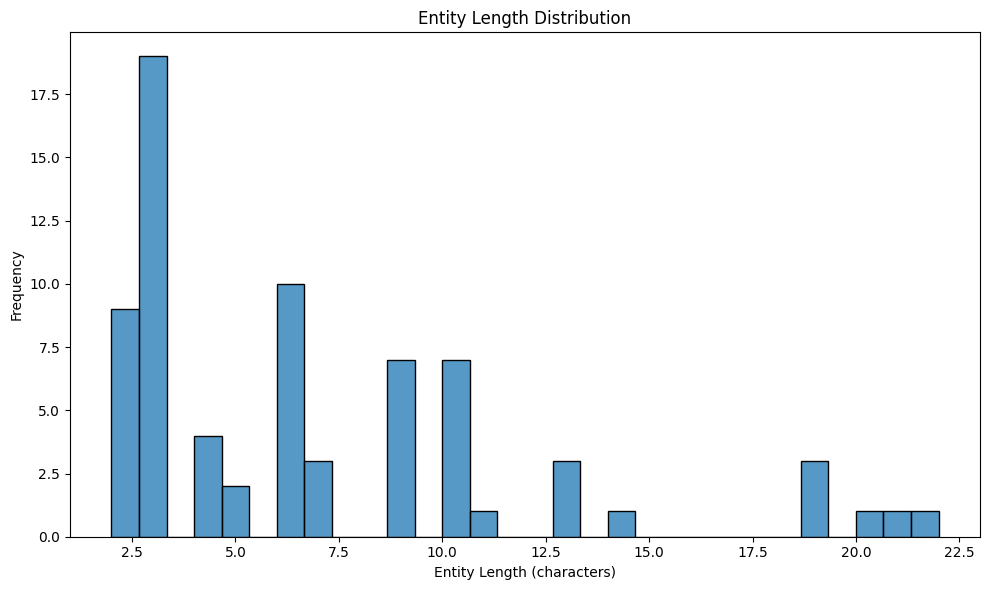


Sample texts with entities:

Text 1: EU rejects German call to boycott British lamb .
Entities:

Text 2: Peter Blackburn
Entities:

Text 3: BRUSSELS 1996-08-22
Entities:

Text 4: The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep .
Entities:

Text 5: Germany 's representative to the European Union 's veterinary committee Werner Zwingmann said on Wednesday consumers should buy sheepmeat from countries other than Britain until the scientific advice was clearer .
Entities:


In [1]:
# notebooks/01_data_exploration.ipynb

import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy

# Load the processed data
processed_dir = os.path.join(os.getcwd(), "..", "data", "processed")
with open(os.path.join(processed_dir, "spacy_train.pickle"), "rb") as f:
    train_data = pickle.load(f)

# 1. Basic statistics
num_samples = len(train_data)
print(f"Number of training samples: {num_samples}")

# 2. Entity distribution
entity_counts = Counter()
entity_lengths = []
for text, annotations in train_data:
    for start, end, label in annotations["entities"]:
        entity_counts[label] += 1
        entity_lengths.append(end - start)

print("\nEntity distribution:")
for entity, count in entity_counts.most_common():
    print(f"{entity}: {count} ({count/sum(entity_counts.values())*100:.2f}%)")

# 3. Visualize entity distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
plt.title("Entity Type Distribution")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("entity_distribution.png")
plt.show()

# 4. Visualize text lengths
text_lengths = [len(text) for text, _ in train_data]
plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("text_length_distribution.png")
plt.show()

# 5. Visualize entity lengths
plt.figure(figsize=(10, 6))
sns.histplot(entity_lengths, bins=30)
plt.title("Entity Length Distribution")
plt.xlabel("Entity Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("entity_length_distribution.png")
plt.show()

# 6. Sample texts with entities
print("\nSample texts with entities:")
for i in range(5):
    text, annotations = train_data[i]
    print(f"\nText {i+1}: {text}")
    print("Entities:")
    for start, end, label in annotations["entities"]:
        print(f"  - {text[start:end]} ({label})")